#### 1. Решите линейную систему:

In [2]:
import numpy as np

A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])

$A * X = B$

Найдём определитель матрицы А - он равен 60, т.е. не равен 0, следовательно мы можем воспользоваться способом:
$X = A^-1 * B$

Обратная матрица равна:

In [5]:
A_1 = np.array([[-0.8, 0.1, 0.2], [0.1, -0.2, 0.1], [0.53, 0.1, -0.13]])
A_1

array([[-0.8 ,  0.1 ,  0.2 ],
       [ 0.1 , -0.2 ,  0.1 ],
       [ 0.53,  0.1 , -0.13]])

Найдём произведение обратной матрицы и матрицы B:

In [9]:
A_2 = np.array([-9.2, 0.9, 6.46])
A_2

array([-9.2 ,  0.9 ,  6.46])

Проверка:

In [11]:
a = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
b = np.array([12, 2, 1])
det = np.linalg.det(a)
print(f'Определитель = {det}')
if det > 0:
    a_1 = np.linalg.inv(a)
    print(a_1)
    x = np.dot(a_1, b)
    print(x)

Определитель = 59.999999999999986
[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]
[-9.2         0.9         6.46666667]


#### 2. Найдите псевдорешение:
##### x + 2y – z = 1
##### 3x – 4y = 7
##### 8x – 5y + 2z = 12
##### 2x – 5z = 7
##### 11x +4y – 7z = 15

In [13]:
a = np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
b = np.array([1,7,12,7,15])

a

array([[ 1,  2, -1],
       [ 3, -4,  0],
       [ 8, -5,  2],
       [ 2,  0, -5],
       [11,  4, -7]])

In [14]:
b

array([ 1,  7, 12,  7, 15])

In [16]:
from numpy.linalg import solve, lstsq
from scipy.linalg import lu
import warnings

warnings.filterwarnings('ignore')

In [17]:
print(lstsq(a,b))

(array([ 1.13919353, -0.90498444, -0.9009803 ]), array([0.71523211]), 3, array([15.2817306 ,  9.59852942,  3.65197794]))


Проверка решения:

In [18]:
print(np.dot(a, [1.13919353, -0.90498444, -0.9009803]))

[ 0.23020495  7.03751835 11.83650984  6.78328856 15.21805317]


#### 3. Сколько решений имеет линейная система:[[1,2,3],[4,5,6],[7,8,9]] * X = [12,2,1] ? Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [19]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([12,2,1])
print(solve(a,b))

[ 2.83726777e+16 -5.67453553e+16  2.83726777e+16]


Данная система не имеет решений (решение численным методом дает значения порядка 10^16). Заменим свободный член во всех уравнениях на 0 и решим новую систему:

In [20]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([0,0,0])
print(solve(a,b))

[ 0.  0. -0.]


Новая система имеет бесконечно много решений. Общее решение: x2 = -2*x1, x3 = x1. Численный метод нашел только одно из решений.

#### 4. Вычислите LU-разложение матрицы: [[1,2,3],[2,16,21],[4,28,73]]

In [21]:
a = np.array([[1,2,3],[2,16,21],[4,28,73]])
p,l,u = lu(a)
print(p, end='\n\n')
print(l, end='\n\n')
print(u)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]

[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


#### 5. Найдите нормальное псевдорешение недоопределенной системы
##### x+2y-z=1
##### 8x-5y+2z=12
#### Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум


In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

Недоопределенные СЛАУ - "вытянутые" прямоугольные, где кол-во неизвестных больше кол-ва уравнений

нормальное псевдорешение
(array([ 1.38191882, -0.18081181,  0.0202952 ]), array([], dtype=float64), 2, array([9.65316119, 2.41173777]))


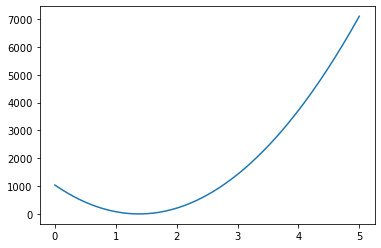

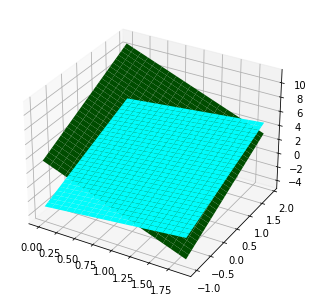

In [23]:
A = np.array([[1,2,-1],[8,-5,2]])
B = np.array([1,12])

def Q(x,y,z):
    return (x**2 + y**2 + z**2)

# найдем x, минимизирующее норму вектора Q(x,y,z)
x=np.linspace(0,5,201)
plt.plot(x,Q(x,10*x - 14,21*x - 29))

# найдем нормальное псевдорешение
print("нормальное псевдорешение")
print(np.linalg.lstsq(A,B))

# Нарисуем трехмерный график решения.
fig = figure()
ax = Axes3D(fig)
X = np.arange(0, 2, 0.1)
Y = np.arange(-1, 2, 0.1)
X, Y = np.meshgrid(X,Y)
Z = (X+2*Y-1)
Z2 = (12-8*X+5*Y)/2

ax.plot_surface(X,Y,Z,color='cyan')
ax.plot_surface(X,Y,Z2,color='green')
ax.scatter(1.38, -0.18, 0.02, 'z', 50, 'red')
show()

#### 6. Найдите одно из псевдорешений вырожденной системы:
#### Попробуйте также отыскать и нормальное псевдорешение.

In [24]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])

Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

R1 = R[:2, :2]
B1 = np.dot(np.transpose(Q), B)[:2]

X1 = np.linalg.solve(R1, B1)
print(X1)
X=np.append(X1, 0)
print(X) #[1.50000000e+00 3.92767275e-15 0.00000000e+00]
print(np.linalg.norm(X)) #1.499999999999996
print(np.linalg.norm(np.dot(A,X) - B)) #1.224744871391589

X = np.linalg.lstsq(A,B, rcond=-1)[0]
print(f'Ответ: {X}') #Ответ: [ 1.25  0.5  -0.25]

print(np.linalg.norm(X)) #1.3693063937629126
print(np.linalg.norm(np.dot(A,X) - B)) #1.2247448713915892

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]
[1.50000000e+00 9.45096256e-15]
[1.50000000e+00 9.45096256e-15 0.00000000e+00]
1.4999999999999893
1.2247448713915885
Ответ: [ 1.25  0.5  -0.25]
1.3693063937629122
1.224744871391588
